In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [45]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


# Data Understanding

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
np.unique(df['CustomerID'], return_counts = True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

Because of CustomerID is a unique number that represent a customer, we will drop it.

In [7]:
df = df.drop('CustomerID', axis = 1)

In [8]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Understanding Summary

The data consists of 4 columns (after dropping the CustomerID column), three of them (Age, Annual Income, Spending Score) are integer and the other one is categorical data (Gender).

# Exploratory Data Analysis

In this exploratory we will try to answer theese questions:
1. How is the distribution of each columns? How is their correlation?
2. How is the composition of the mall's customer based on their gender, Age, Annual Income, Spending Score?
3. How is the distribution of each columns based on gender?
4. Which age has highest annual income and spending score?
5. Which gender has highest annual income and spending score?

##  Columns Distribution

In [9]:
df1 = df.copy()

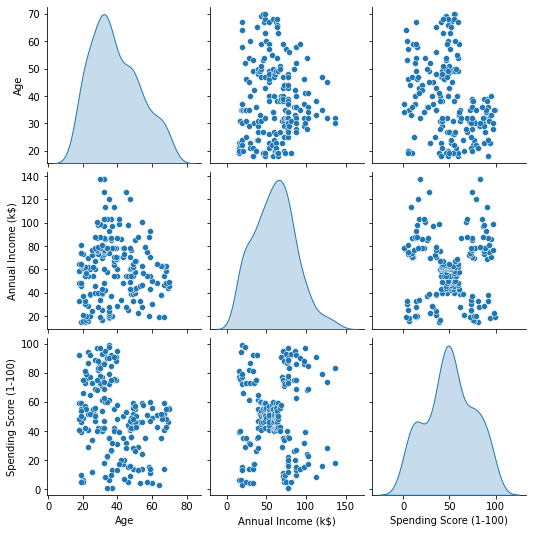

In [10]:
sns.pairplot(df1, diag_kind = 'kde')
plt.show()

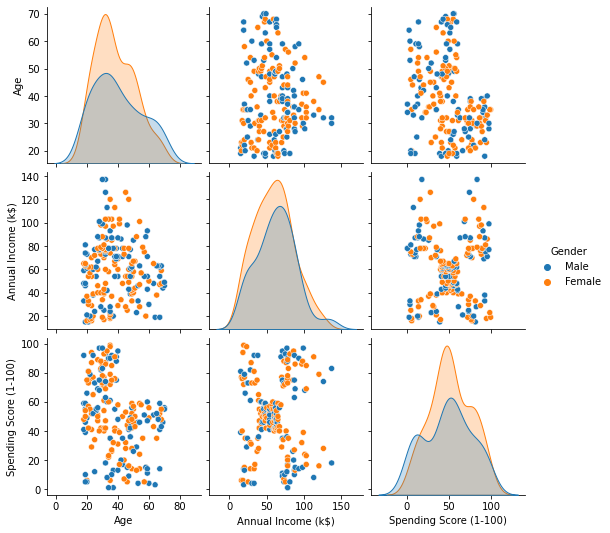

In [11]:
sns.pairplot(df1, hue = 'Gender')
plt.show()

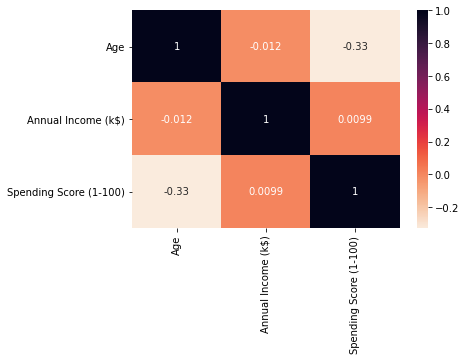

In [12]:
cor = df.corr()

sns.heatmap(cor, annot = True, cmap ='rocket_r')
plt.show()

There is no significant correlation between the columns

##  Customer Composition

In [13]:
def ranges(num):
    for i in range(1,100):
        if num < 10*i : return f'{(i-1)*10} - {i*10}'

# Change the spending score into range
df1['spend-range'] = df1['Spending Score (1-100)'].apply(ranges)
df1['age-range'] = df1['Age'].apply(ranges)
df1['income-range'] = df1['Annual Income (k$)'].apply(ranges)
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),spend-range,age-range,income-range
0,Male,19,15,39,30 - 40,10 - 20,10 - 20
1,Male,21,15,81,80 - 90,20 - 30,10 - 20
2,Female,20,16,6,0 - 10,20 - 30,10 - 20
3,Female,23,16,77,70 - 80,20 - 30,10 - 20
4,Female,31,17,40,40 - 50,30 - 40,10 - 20


### Based on Gender

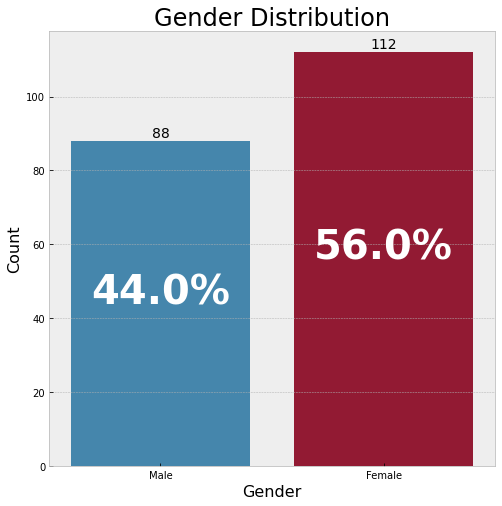

In [14]:
# Gender Distribution
plt.style.use('bmh')
plt.figure(figsize = (8,8))

plots = sns.countplot(x = 'Gender', data = df1)
plots.set_title('Gender Distribution', fontsize = 24)

for bar in plots.patches:
    plots.text(x = bar.get_x() + bar.get_width()/2, y = bar.get_height()/2,
               s = f"{np.round(bar.get_height()/len(df1)*100, 2)}%",
               ha = 'center', size = 40, weight = 'bold', color = 'white')
    plots.text(x = bar.get_x() + bar.get_width()/2, y = bar.get_height()+1,
             s = np.round(bar.get_height(),2), ha = 'center',
               size = 14,
              color = 'black')
plots.set_xlabel('Gender', size = 16)
plots.set_ylabel('Count', size = 16)

plt.show()

### Based on Age

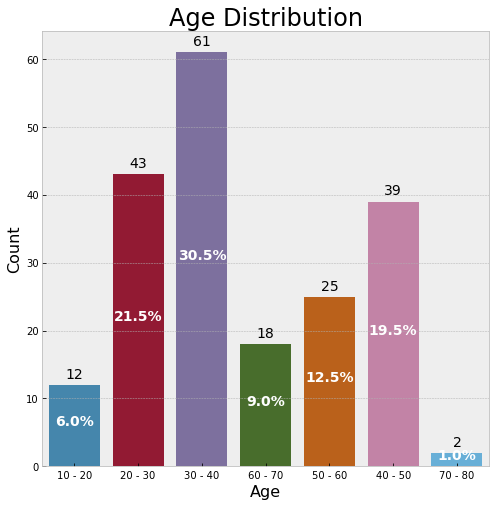

In [15]:
# Age Distribution
plt.style.use('bmh')
plt.figure(figsize = (8,8))

plots = sns.countplot(x = 'age-range', data = df1)
plots.set_title('Age Distribution', fontsize = 24)

for bar in plots.patches:
    plots.text(x = bar.get_x() + bar.get_width()/2, y = bar.get_height()/2,
               s = f"{np.round(bar.get_height()/len(df1)*100, 2)}%",
               ha = 'center', size = 14, weight = 'bold', color = 'white')
    plots.text(x = bar.get_x() + bar.get_width()/2, y = bar.get_height()+1,
             s = np.round(bar.get_height(),2), ha = 'center',
               size = 14,
              color = 'black')

plots.set_xlabel('Age', size = 16)
plots.set_ylabel('Count', size = 16)

plt.show()

In [16]:
df1.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


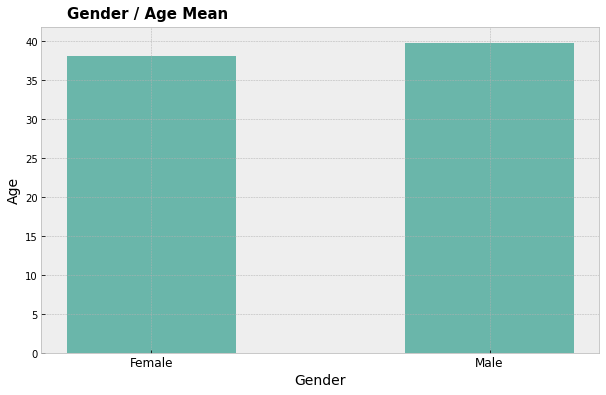

In [17]:
mf = df1.groupby('Gender')['Age'].mean()

plt.style.use('bmh')

fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.bar(mf.index, mf, width=0.5, color='#49A999', alpha=0.8)

  
plt.xticks(rotation = 0, fontsize = 12)
plt.xlabel('Gender', fontfamily = 'sans', fontsize = 14)
plt.ylabel('Age', fontfamily = 'sans', fontsize = 14)
fig.text(0.16, 0.9, 'Gender / Age Mean', fontsize=15, fontweight='bold', fontfamily='sans')



plt.show()

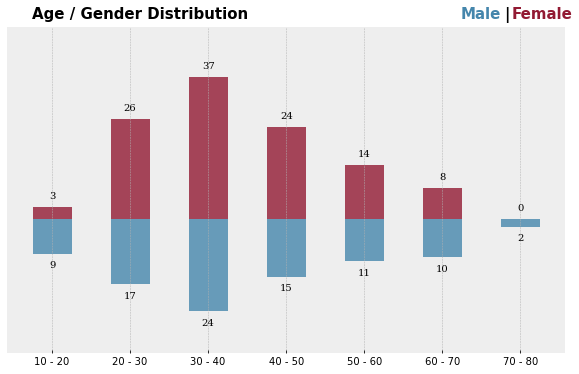

In [18]:
mf = df1.groupby('Gender')['age-range'].value_counts().unstack().sort_index().fillna(0).astype(int)

plt.style.use('bmh')
female = mf.loc['Female']
male = -mf.loc['Male']

fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.bar(male.index, male, width=0.5, color='#4586AC', alpha=0.8, label='Male')
ax.bar(female.index, female, width=0.5, color='#921A33', alpha=0.8, label='Female')
ax.set_ylim(-35, 50)

# Annotations
for i in female.index:
    ax.annotate(f"{female[i]}", 
                   xy=(i, female[i] + 3),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')   

for i in male.index:
    ax.annotate(f"{-male[i]}", 
                   xy=(i, male[i] - 3),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')
    
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)


ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 0.9, 'Age / Gender Distribution', fontsize=15, fontweight='bold', fontfamily='sans')

fig.text(0.755,0.9,"Male", fontweight="bold", fontfamily='sans', fontsize=15, color='#4586AC')
fig.text(0.815,0.9,"|", fontweight="bold", fontfamily='sans', fontsize=15, color='black')
fig.text(0.825,0.9,"Female", fontweight="bold", fontfamily='sans', fontsize=15, color='#921A33')



plt.show()


Customers with age between **20-50 years old** are the majority of the customer

### Based on Annual Income

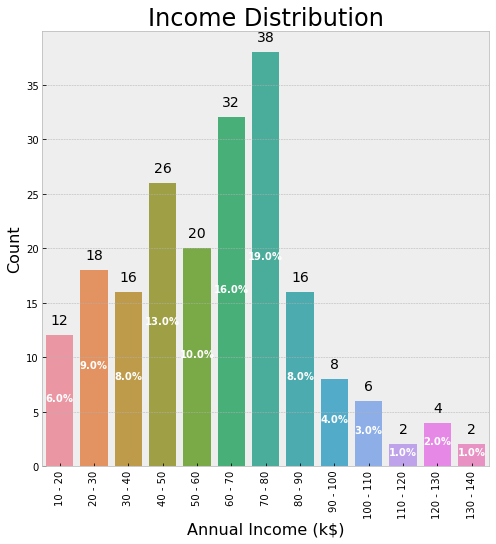

In [19]:
# Income Distribution
plt.style.use('bmh')
plt.figure(figsize = (8,8))

plots = sns.countplot(x = 'income-range', data = df1)
plots.set_title('Income Distribution', fontsize = 24)

for bar in plots.patches:
    plots.text(x = bar.get_x() + bar.get_width()/2, y = bar.get_height()/2,
               s = f"{np.round(bar.get_height()/len(df1)*100, 2)}%",
               ha = 'center', size = 10, weight = 'bold', color = 'white')
    plots.text(x = bar.get_x() + bar.get_width()/2, y = bar.get_height()+1,
             s = np.round(bar.get_height(),2), ha = 'center',
               size = 14,
              color = 'black')

plots.set_xlabel('Annual Income (k$)', size = 16)
plots.set_ylabel('Count', size = 16)
plt.xticks(rotation = 90)
plt.show()

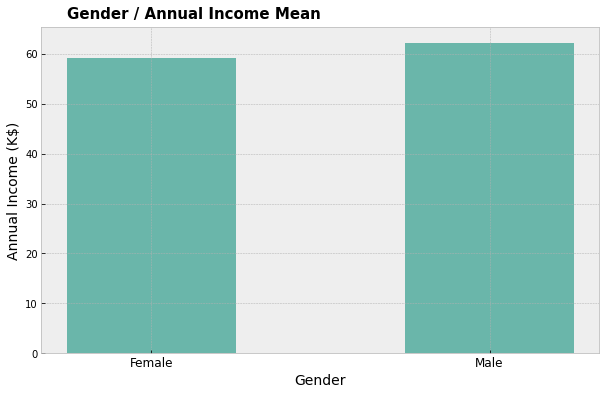

In [20]:
mf = df1.groupby('Gender')['Annual Income (k$)'].mean()

plt.style.use('bmh')

fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.bar(mf.index, mf, width=0.5, color='#49A999', alpha=0.8, label='Male')

    
plt.xticks(rotation = 0, fontsize = 12)
plt.xlabel('Gender', fontfamily = 'sans', fontsize = 14)
plt.ylabel('Annual Income (K$)', fontfamily = 'sans', fontsize = 14)
ax.legend().set_visible(False)
fig.text(0.16, 0.9, 'Gender / Annual Income Mean', fontsize=15, fontweight='bold', fontfamily='sans')



plt.show()

There is **no significant different** on annual income between male and female

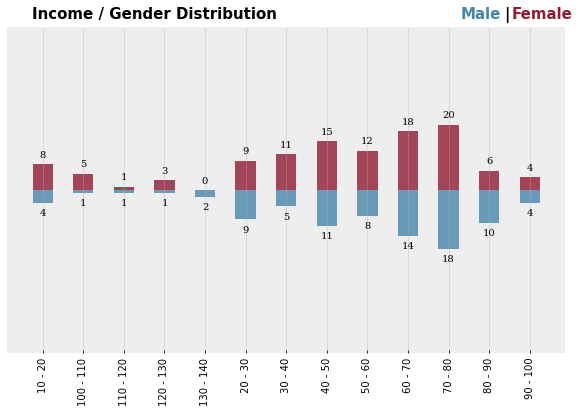

In [21]:
mf = df1.groupby('Gender')['income-range'].value_counts().unstack().fillna(0).astype(int)

plt.style.use('bmh')
female = mf.loc['Female']
male = -mf.loc['Male']

fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.bar(male.index, male, width=0.5, color='#4586AC', alpha=0.8, label='Male')
ax.bar(female.index, female, width=0.5, color='#921A33', alpha=0.8, label='Female')
ax.set_ylim(-50, 50)

# Annotations
for i in female.index:
    ax.annotate(f"{female[i]}", 
                   xy=(i, female[i] + 3),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')   

for i in male.index:
    ax.annotate(f"{-male[i]}", 
                   xy=(i, male[i] - 3),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')
    
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)


ax.set_yticks([])    
plt.xticks(rotation = 90)
ax.legend().set_visible(False)
fig.text(0.16, 0.9, 'Income / Gender Distribution', fontsize=15, fontweight='bold', fontfamily='sans')

fig.text(0.755,0.9,"Male", fontweight="bold", fontfamily='sans', fontsize=15, color='#4586AC')
fig.text(0.815,0.9,"|", fontweight="bold", fontfamily='sans', fontsize=15, color='black')
fig.text(0.825,0.9,"Female", fontweight="bold", fontfamily='sans', fontsize=15, color='#921A33')



plt.show()


So the majority customer are whom with annual income between **40 - 80 k$**

### Based on Spending Score

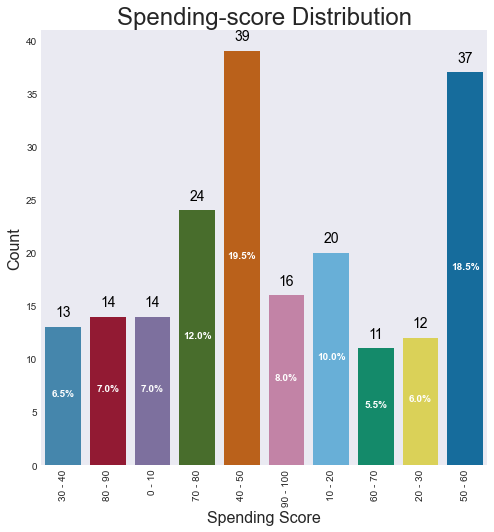

In [22]:
# Spending Score Distribution
plt.style.use('seaborn-dark')
plt.figure(figsize = (8,8))

plots = sns.countplot(x = 'spend-range', data = df1)
plots.set_title('Spending-score Distribution', fontsize = 24)

for bar in plots.patches:
    plots.text(x = bar.get_x() + bar.get_width()/2, y = bar.get_height()/2,
               s = f"{np.round(bar.get_height()/len(df1)*100, 2)}%",
               ha = 'center', size = 10, weight = 'bold', color = 'white')
    plots.text(x = bar.get_x() + bar.get_width()/2, y = bar.get_height()+1,
             s = np.round(bar.get_height(),2), ha = 'center',
               size = 14,
              color = 'black')

plots.set_xlabel('Spending Score', size = 16)
plots.set_ylabel('Count', size = 16)
plt.xticks(rotation = 90)
plt.show()

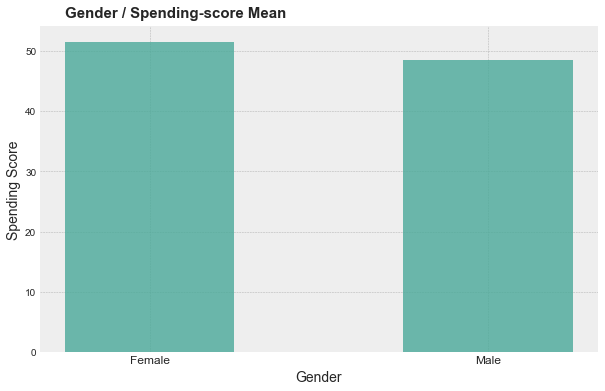

In [23]:
mf = df1.groupby('Gender')['Spending Score (1-100)'].mean()

plt.style.use('bmh')

fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.bar(mf.index, mf, width=0.5, color='#49A999', alpha=0.8, label='Male')
   
plt.xticks(rotation = 0, fontsize = 12)
plt.xlabel('Gender', fontfamily = 'sans', fontsize = 14)
plt.ylabel('Spending Score', fontfamily = 'sans', fontsize = 14)
ax.legend().set_visible(False)
fig.text(0.16, 0.9, 'Gender / Spending-score Mean', fontsize=15, fontweight='bold', fontfamily='sans')


plt.show()

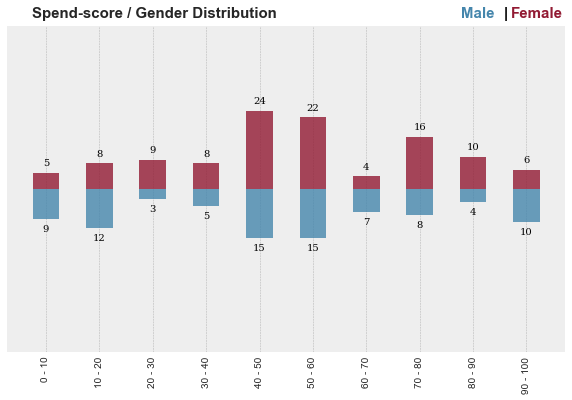

In [24]:
mf = df1.groupby('Gender')['spend-range'].value_counts().unstack().fillna(0).astype(int)

plt.style.use('bmh')
female = mf.loc['Female']
male = -mf.loc['Male']

fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.bar(male.index, male, width=0.5, color='#4586AC', alpha=0.8, label='Male')
ax.bar(female.index, female, width=0.5, color='#921A33', alpha=0.8, label='Female')
ax.set_ylim(-50, 50)

# Annotations
for i in female.index:
    ax.annotate(f"{female[i]}", 
                   xy=(i, female[i] + 3),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')   

for i in male.index:
    ax.annotate(f"{-male[i]}", 
                   xy=(i, male[i] - 3),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')
    
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)


ax.set_yticks([])    
plt.xticks(rotation = 90)
ax.legend().set_visible(False)
fig.text(0.16, 0.9, 'Spend-score / Gender Distribution', fontsize=15, fontweight='bold', fontfamily='sans')

fig.text(0.755,0.9,"Male", fontweight="bold", fontfamily='sans', fontsize=15, color='#4586AC')
fig.text(0.815,0.9,"|", fontweight="bold", fontfamily='sans', fontsize=15, color='black')
fig.text(0.825,0.9,"Female", fontweight="bold", fontfamily='sans', fontsize=15, color='#921A33')



plt.show()

So, the majority customer are whom with spend score between **40 - 60**

## Spending-score / Age

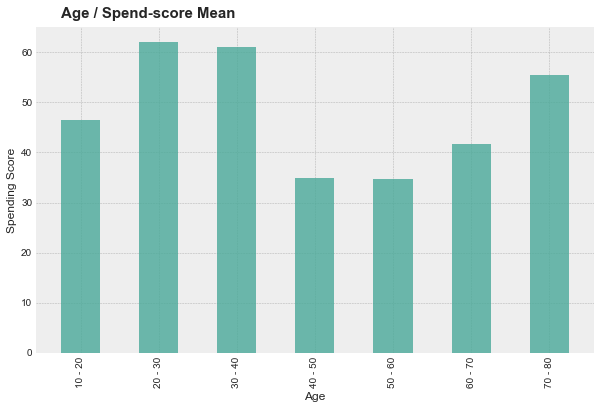

In [25]:
mf = df1.groupby('age-range')['Spending Score (1-100)'].mean()

plt.style.use('bmh')

fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.bar(mf.index, mf, width=0.5, color='#49A999', alpha=0.8, label='Male')

  
plt.xticks(rotation = 90)
plt.xlabel('Age')
plt.ylabel('Spending Score')
ax.legend().set_visible(False)
fig.text(0.16, 0.9, 'Age / Spend-score Mean', fontsize=15, fontweight='bold', fontfamily='sans')



plt.show()

So, customers with high spending-score are whom with age between **20-40 years old**

## Annual Income / Age

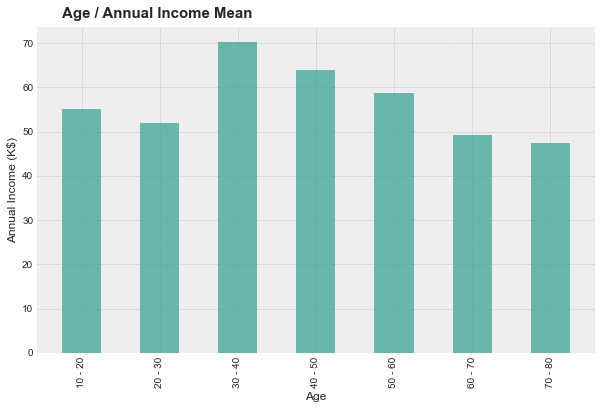

In [26]:
mf = df1.groupby('age-range')['Annual Income (k$)'].mean()

plt.style.use('bmh')


fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.bar(mf.index, mf, width=0.5, color='#49A999', alpha=0.8, label='Male')

plt.xticks(rotation = 90)
plt.xlabel('Age', fontfamily = 'sans', fontsize = 12)
plt.ylabel('Annual Income (K$)', fontfamily = 'sans', fontsize = 12)
ax.legend().set_visible(False)
fig.text(0.16, 0.9, 'Age / Annual Income Mean', fontsize=15, fontweight='bold', fontfamily='sans')




plt.show()

So, customers with the highest income are those with ages between **30-40 years old**

## Insight from EDA

The answer theese questions:

***1. How is the distribution of each columns? How is their correlation?***

-The distribution of each colomns is **not normally distributed** as the plot shown. There is also **no significant correlation** between columns

***2. How is the composition of the mall's customer based on their gender, Age, Annual Income, Spending Score?***

-The customers are consist of **56% of female and 44% of male**. The majority of the customers are those with age, annual income, spending-score between **20-50 years old**, **40-80 k$**, and **40 - 60**, respectively. Gender has no significant impact on these parameters.

***3. How is the distribution of each column based on gender?***

-The distribution of each column based on gender is **not normally distributed** as the plot shown.

***4. Which age has highest annual income and spending score?***

-Customers with the highest spending score are those with ages between **20 - 40 years old**.

-Customers with the highest annual income are those with ages between **30 - 40 years old**.

So, customers with ages between **30 - 40 years old** are those who have **high annual income and high spending score**.

***5. Which gender has highest annual income and spending score?***

-Gender has **no significant impact** in this case.

Since gender has no significant role in this case, we will drop the gender column

In [27]:
drop = ['Gender', 'age-range', 'income-range', 'spend-range']
df2 = df1.drop(drop, axis = 1)

In [28]:
df2

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


So the columns that will be proceed into next step are **Age, Annual Income (k$), and Spending Score (1 - 100)** 

# Clustering

In this case, we will use K-Means Clustering to segmenting the customers. We will be using elbow method and silhouette method to determine the best k values.

In [29]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


## The Elbow Method

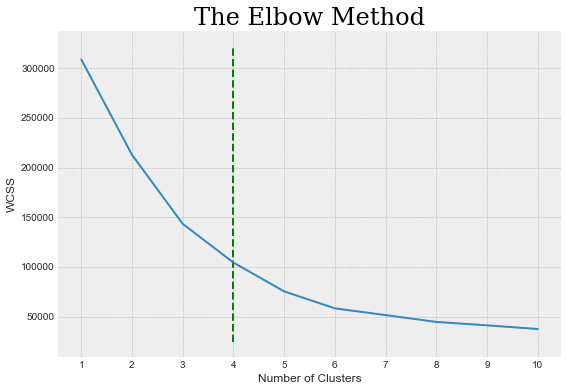

In [30]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

X = df2.values

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

kn = KneeLocator(range(1,11), wcss, curve = 'convex', direction = 'decreasing')

plt.figure(figsize = (9,6))
plt.plot(range(1,11), wcss)
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], 
           linestyle = 'dashed', color = 'green')
plt.title('The Elbow Method', color = 'black', fontsize = '24',
          fontfamily = 'serif')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11))
plt.show()

From the elbow method we could know **the best number of cluster is 4**

In [61]:
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 123)
clusters = km.fit_predict(df2)
df2['label'] = clusters
df2['label'].unique()

array([0, 2, 1, 3])

In [59]:
import plotly.express as px

fig = px.scatter_3d(data_frame = df2, x = 'Age', y = 'Annual Income (k$)',
                   z = 'Spending Score (1-100)', color = 'label', size = 'label')
fig.show()

So, from the 3D plot, we could say that the customers are clustered into three different clusters. Basically, we could divide the clusters into two based on annual income, mid-low and mid-high where the mid is 65k$. The mid-high cluster could be divided again into two clusters, high spending score and low spending score.

# The Business Action

Customers with mid-high annual income, low spending score, and ages with a range between 30 - 50 years old (**yellow label**) should be targeted to increase their spending score into mid (between 50 - 60). We should also target the customer with a mid annual income (40 - 60 k$) and mid spending score (40 - 60), which is **the majority of our customers**, to increase their spending score to more than 60. For the purple label of customers, **we should maintain their spending score**.